# Outline
<div class="alert alert-block alert-success" style="margin-top:20px">
    <font color=#FF0000>
    
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Goals of the Case Study](#2.3)
  - [ 2.3 Loading and Describing the data](#2.3)
  - [ 2.4 Exploratory Data Analysis](#2.4)
      - [2.4.1 Categorical Variables](#2.4.1)
      - [2.4.2 Numerical Variables](#2.4.2)
      - [2.4.3 Dummey Variables Creation](#2.4.3)
  - [ 2.5 Feature Scaling](#2.5)
  - [ 2.6 Logistic Regression, Manually](#2.6)
      - [ 2.6.1 View Data](#2.6.1)
      - [ 2.6.2 Sigmoid function](#2.6.2)
      - [ 2.6.3 Cost function for logistic regression](#2.6.3)
      - [ 2.6.4 Gradient for logistic regression](#2.6.4)
      - [ 2.6.5 Learning parameters using gradient descent ](#2.6.5)
      - [ 2.6.6 Plotting the decision boundary](#2.6.6)
      - [ 2.6.7 Evaluating logistic regression](#2.6.7)
      - [ 2.6.8 Feature mapping](#2.6.8)
  - [ 2.7 Regularized Logistic Regression, Manually](#2.7)
      - [ 2.7.1 Cost function for regularized logistic regression](#2.7.1)
      - [ 2.7.2 Gradient for regularized logistic regression](#2.7.2)
  - [ 2.8 Logistic Model ](#2.8)
      - [ 2.8.1 Building Model](#2.8.1)
- [3 - References](#3)
  </font>
</div>

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that we will need during this assignment.

In [1]:
import copy
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<a name="2.2"></a>
### 2.2 Goals of the Case Study

*Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.*



<a name="2.3"></a>
### 2.3 Loading and Describing the data


In [2]:
# Let's import the data
df = pd.read_csv("Leads.csv")
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
print(f'Shape of data:{df.shape}', '\n')
print('='*75,'\n')
print(df.info(),'\n')
print('='*75)
df.describe()

Shape of data:(9240, 37) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit    

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**It seems there are a lot of missing values data that need to deal.**

<a name="2.4"></a>
### 2.4 EXPLORATORY DATA ANALYSIS

In [4]:
#let's check for duplicates.

if sum(df.duplicated(subset='Prospect ID'))==0 and sum(df.duplicated(subset='Lead Number'))==0:
    print('There were not found any duplicated data ^_^')
    print('-'*50)
    print("Since Lead Number and Prospect ID have all unique values, let's drop them")
    df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
    
else: print('You should deal with duplicate data')
df.head(2)

There were not found any duplicated data ^_^
--------------------------------------------------
Since Lead Number and Prospect ID have all unique values, let's drop them


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


**_There are many 'select' values that seem the customers didn't fill them. let's replace them with Non_**

In [5]:
df = df.replace('Select', np.nan)
df.tail(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.0,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.0,SMS Sent,Bangladesh,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


**Good, let's check the percentage of Null values**

In [6]:
temp = round(df.isnull().sum() / len(df.index )* 100, 2)
temp

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**As a contract, let's eliminate the columns that have more than threshold null values**

In [7]:
threshold = 45

colm = df.columns

for i,j in enumerate(colm):
    if temp[i] >= threshold:
        df.drop(j, axis=1, inplace=True)
        print(f'The column "{j}" is dropped')

The column "How did you hear about X Education" is dropped
The column "Lead Quality" is dropped
The column "Lead Profile" is dropped
The column "Asymmetrique Activity Index" is dropped
The column "Asymmetrique Profile Index" is dropped
The column "Asymmetrique Activity Score" is dropped
The column "Asymmetrique Profile Score" is dropped


<a name = "2.4.1"></a>
### 2.4.1 Categorical Variables
**Now, we should check categorical columns to analyze data well.**

<function matplotlib.pyplot.show(close=None, block=None)>

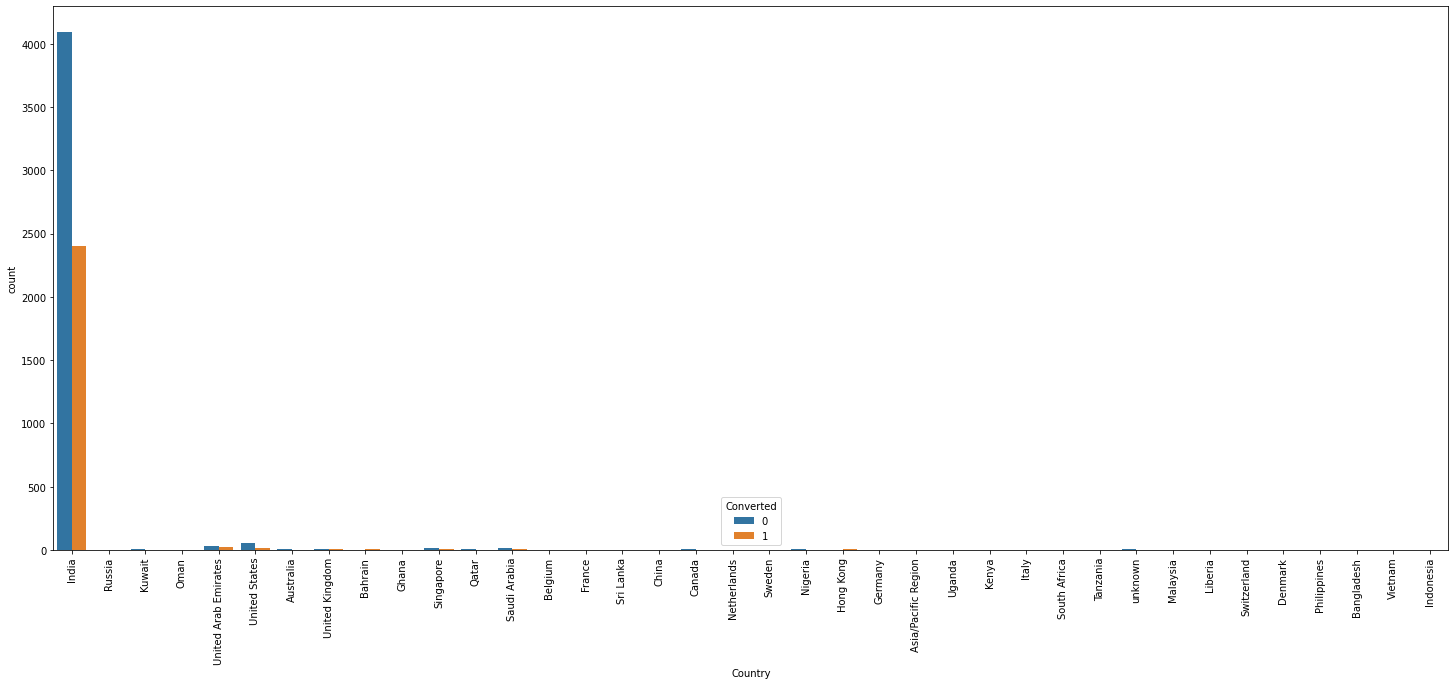

In [8]:
#Let's start with Country
plt.figure(figsize=(25,10))
ax1 = sns.countplot(x=df.Country, hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show

**Wow!!!**

It seems the the number of values for India are very bigh, let's check its frequency.

In [9]:
round(100*( df['Country'].value_counts(dropna=False) / len(df.index)),2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Germany                  0.04
Nigeria                  0.04
South Africa             0.04
Canada                   0.04
Kuwait                   0.04
Sweden                   0.03
Belgium                  0.02
China                    0.02
Netherlands              0.02
Bangladesh               0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Philippines              0.02
Italy                    0.02
Uganda                   0.02
Sri Lanka                0.01
Kenya                    0.01
Denmark                  0.01
Switzerland              0.01
Liberia   

*A strategy can be to suppose the data are about India and drop this column.*

In [10]:
colms_to_drop = ['Country']

*let's check Cities*

In [11]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
#Replace Null values with Mumbai
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

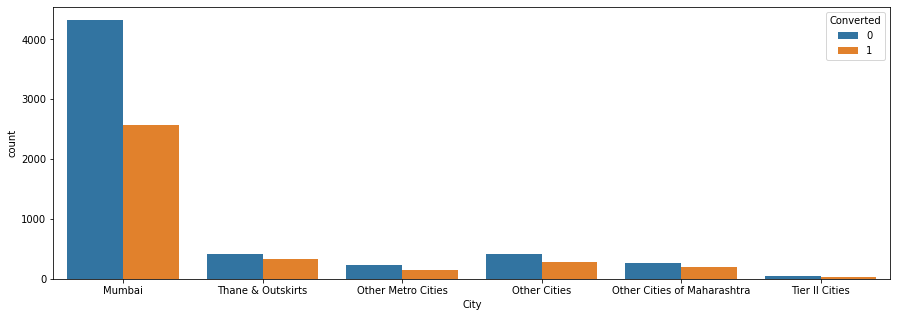

In [13]:
plt.figure(figsize=(15,5))
ax1 = sns.countplot(x = df['City'], hue = df.Converted)
plt.show()

**Now that we checked Country and City, In the following we are checking Specialization column**

In [14]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

_There are a lot of Null values in this column and it maybe says there was no value in the list to choose or maybe It's because of students. so let's replace them with 'Not Specified'_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


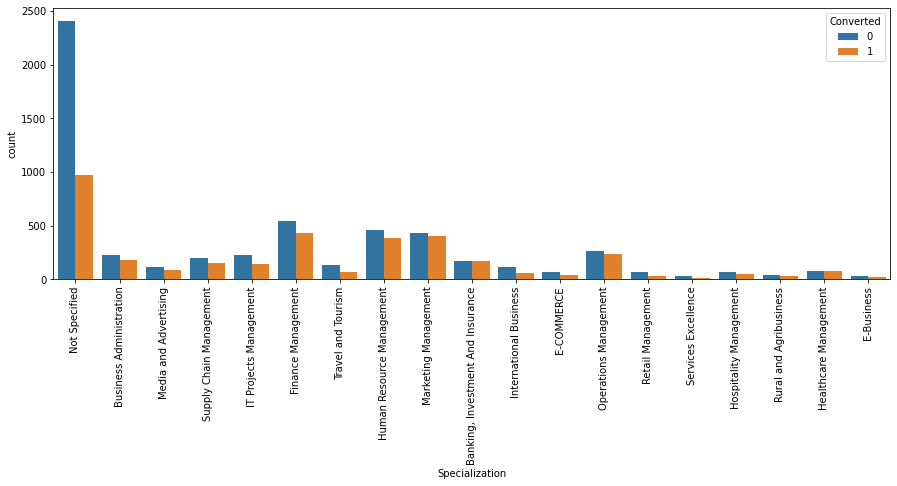

In [15]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

plt.figure(figsize = (15,5))
ax = sns.countplot(df.Specialization, hue=df.Converted)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

*Look!! There are similar trends between management fields, why don't we combine them as Management specialization? let's do it.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


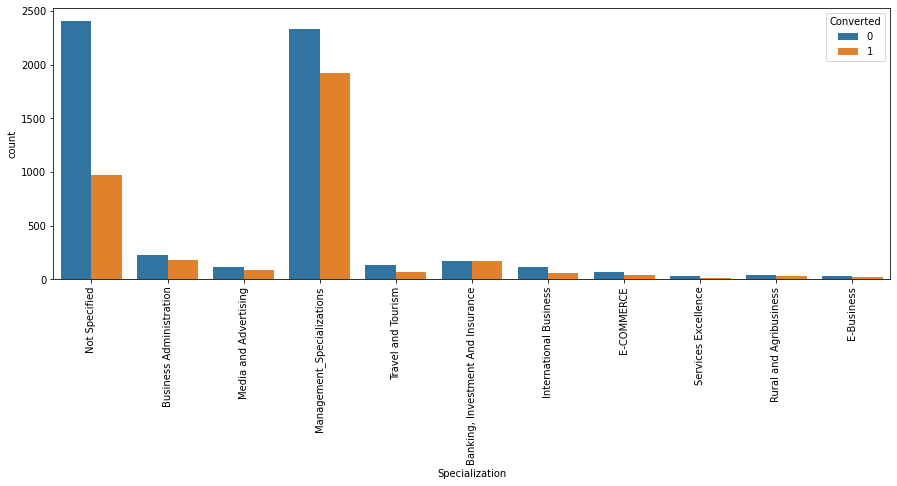

In [16]:
df['Specialization'] = df['Specialization'].replace(['Retail Management'        , 
                                                     'Finance Management'       ,
                                                     'Marketing Management'     ,
                                                     'Operations Management'    ,
                                                     'Healthcare Management'    ,
                                                     'Hospitality Management'   ,
                                                     'IT Projects Management'   ,
                                                     'Supply Chain Management'  ,
                                                     'Human Resource Management',
                                                  ], 'Management_Specializations')

#let's plot the Specialization column with new changes

plt.figure(figsize=(15,5))
ax = sns.countplot(df.Specialization, hue=df.Converted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**it's Okay :), let's check next feature**

In [17]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

we can replace Nan values with unemployed label

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


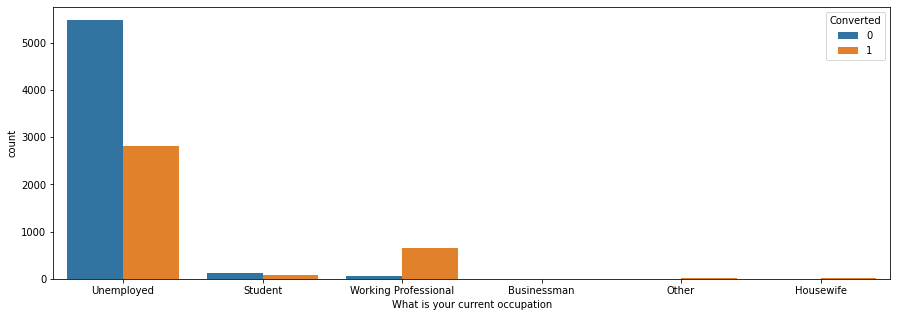

In [18]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

print(df['What is your current occupation'].value_counts(dropna = False))
print('='*65)

plt.figure(figsize=(15,5))
ax = sns.countplot(df['What is your current occupation'], hue = df.Converted)
plt.show()

it seems 'Working Professional' has high chance to join :)

let's check the next feature

In [19]:
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Look! It seems null values are related to 'Better Career Prospects' and we should replace it with that.

After replacing, this feature can't help us well, so it worth dropped.

In [20]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,
                                                                                                'Better Career Prospects')
colms_to_drop.append('What matters most to you in choosing a course')
print(colms_to_drop)

['Country', 'What matters most to you in choosing a course']


In [21]:
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


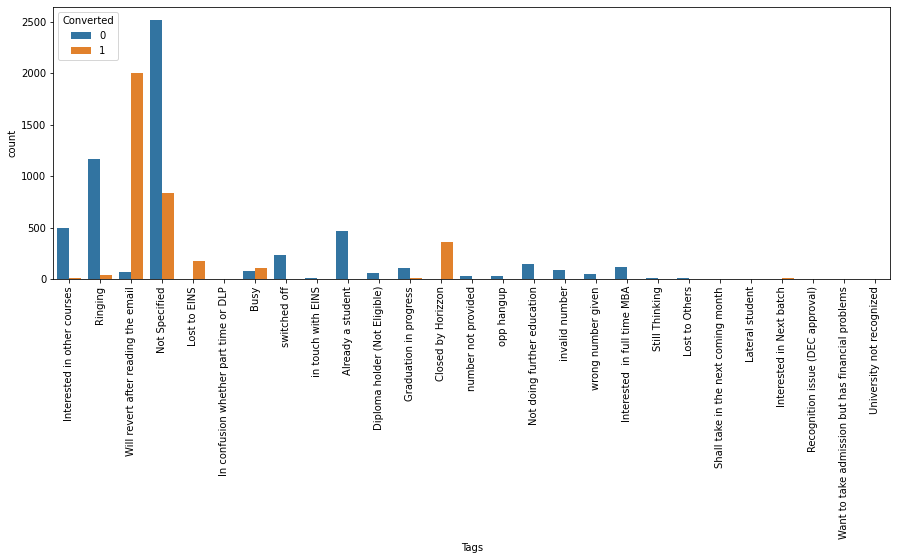

In [22]:
# It's not easy to decide the null is belong to which categories, so we replace it with "Not Specified".
df['Tags'] = df['Tags'].replace(np.nan, 'Not Specified')

plt.figure(figsize=(15,5))
ax = sns.countplot(df.Tags , hue = df.Converted)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

**There are some tags with low frequency, let's combine them as other tags.**

In [23]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','number not provided',
                                 'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month',
                                 'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)',
                                 'Want to take admission but has financial problems', 'University not recognized',
                                 'wrong number given','Diploma holder (Not Eligible)', 'invalid number' ], 'Other_Tags')

In [24]:
#let's check again percentage of missing values.

round(100*(df.isnull().sum() / len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [25]:
df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
testone                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

There are some wrong values that need to be correct. 

for exp; we have Google and google and they both refer to one, Or Social media is general than facebook.

And finally let's combine low frequency values as other and also correct null value with other. 

In [26]:
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Others')
df['Lead Source'] = df['Lead Source'].replace('Facebook', 'Social Media')
df['Lead Source'] = df['Lead Source'].replace(['welearnblog_Home', 'youtubechannel', 'NC_EDM',
                                               'testone', 'Pay per Click Ads', 'blog', 'WeLearn',
                                               'Press_Release', 'Live Chat', 'Click2call', 'bing'], 'Others')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


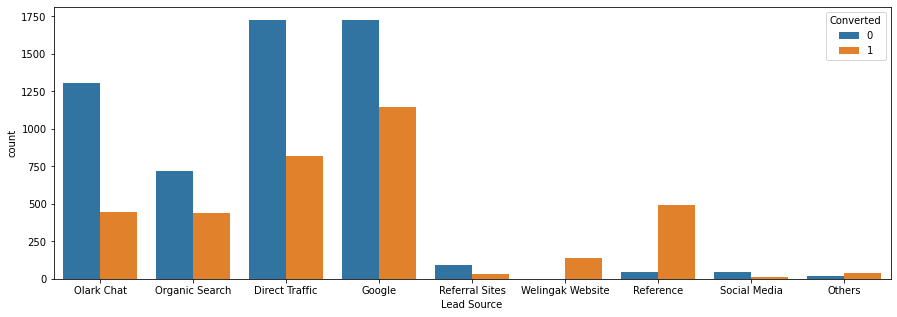

In [27]:
plt.figure(figsize = (15,5))
ax = sns.countplot(df['Lead Source'], hue = df.Converted)
plt.show()

As an inference, we can say:

lead Reference and Welingak Website are converted mostly and don't need to pay more focus on them. they should focus on Olark chat, Organic search, and Google to improve overall lead conversion.

In [28]:
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


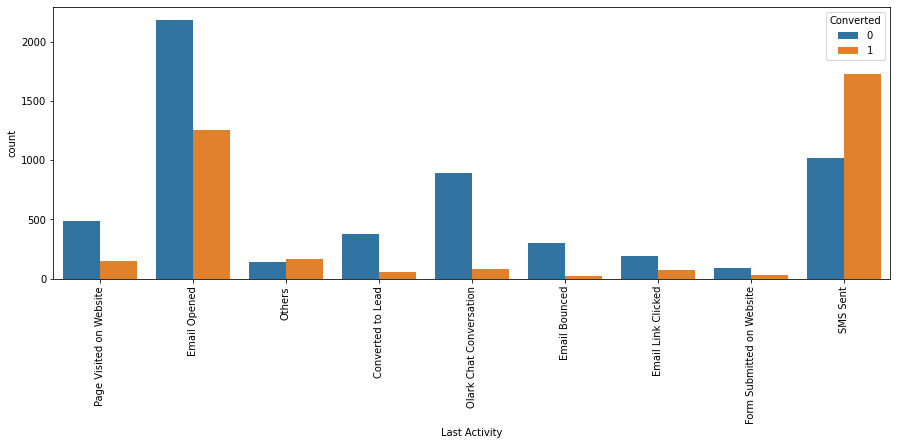

In [29]:
#It seems we should combine low frequency and also replace Null value. 
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Others')
df['Last Activity'] = df['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                   'Email Marked Spam', 'Email Received', 'View in browser link Clicked',
                                                   'Approached upfront', 'Had a Phone Conversation', 'Unsubscribed',
                                                   'Unreachable'], 'Others')

#and fainally let's plot this feature.
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Last Activity'], hue = df.Converted)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()

In [30]:
df['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [31]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Form Submitted on Website', 'Resubscribed to emails',
                                                                   'Approached upfront', 'Email Received',
                                                                   'View in browser link Clicked', 'Email Marked Spam',
                                                                   'Had a Phone Conversation', 'Unreachable', 'Unsubscribed',
                                                                   'Email Bounced'], 'Other_Notable_activity')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


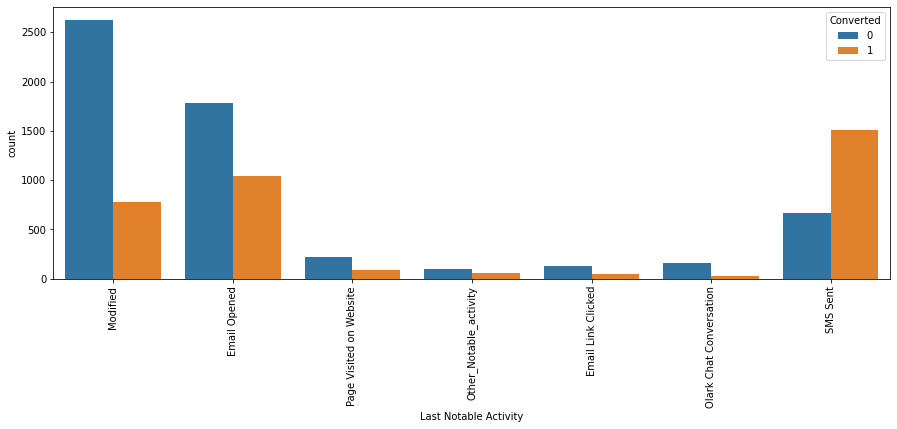

In [32]:
plt.figure(figsize = (15,5))
ax = sns.countplot(df['Last Notable Activity'], hue = df.Converted)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

**let's check missing values**

In [33]:
round(100*(df.isnull().sum() / len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

the country feature has a high null value. since this feature is related to the city column, we can replace the null value with respect to the city feature. it seems there is a link between Mumbai in the City and null value in the Country. let's check and be sure.

In [34]:
df.loc[(df.City=='Mumbai'), "Country"] = df.loc[(df.City=='Mumbai'), "Country"].replace(np.nan, 'India')
round(100*(df.isnull().sum() / len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          2.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

**_Till yet,  we have dealt with missing values of categorical features and it's done. for numerical features, there are also two features that have been not dealt with yet. Since the percentage of these two features are roughly less than 2% we can drop corresponding rows._**

In [35]:
df = df.dropna()
print(f'The shape of data is {(df.shape)}, after dropping null value')
print('='*70, '\n', 'Here we are checking null value again')
round(100*(df.isnull().sum() / len(df.index)), 2)

The shape of data is (8933, 28), after dropping null value
 Here we are checking null value again


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

So far we tried to deal with null values, to create the model we should check Imbalanced features and drop them too.

before checking Imbalanced values, we'll figure out categorical features and then we'll check Imbalancing.

let's go!

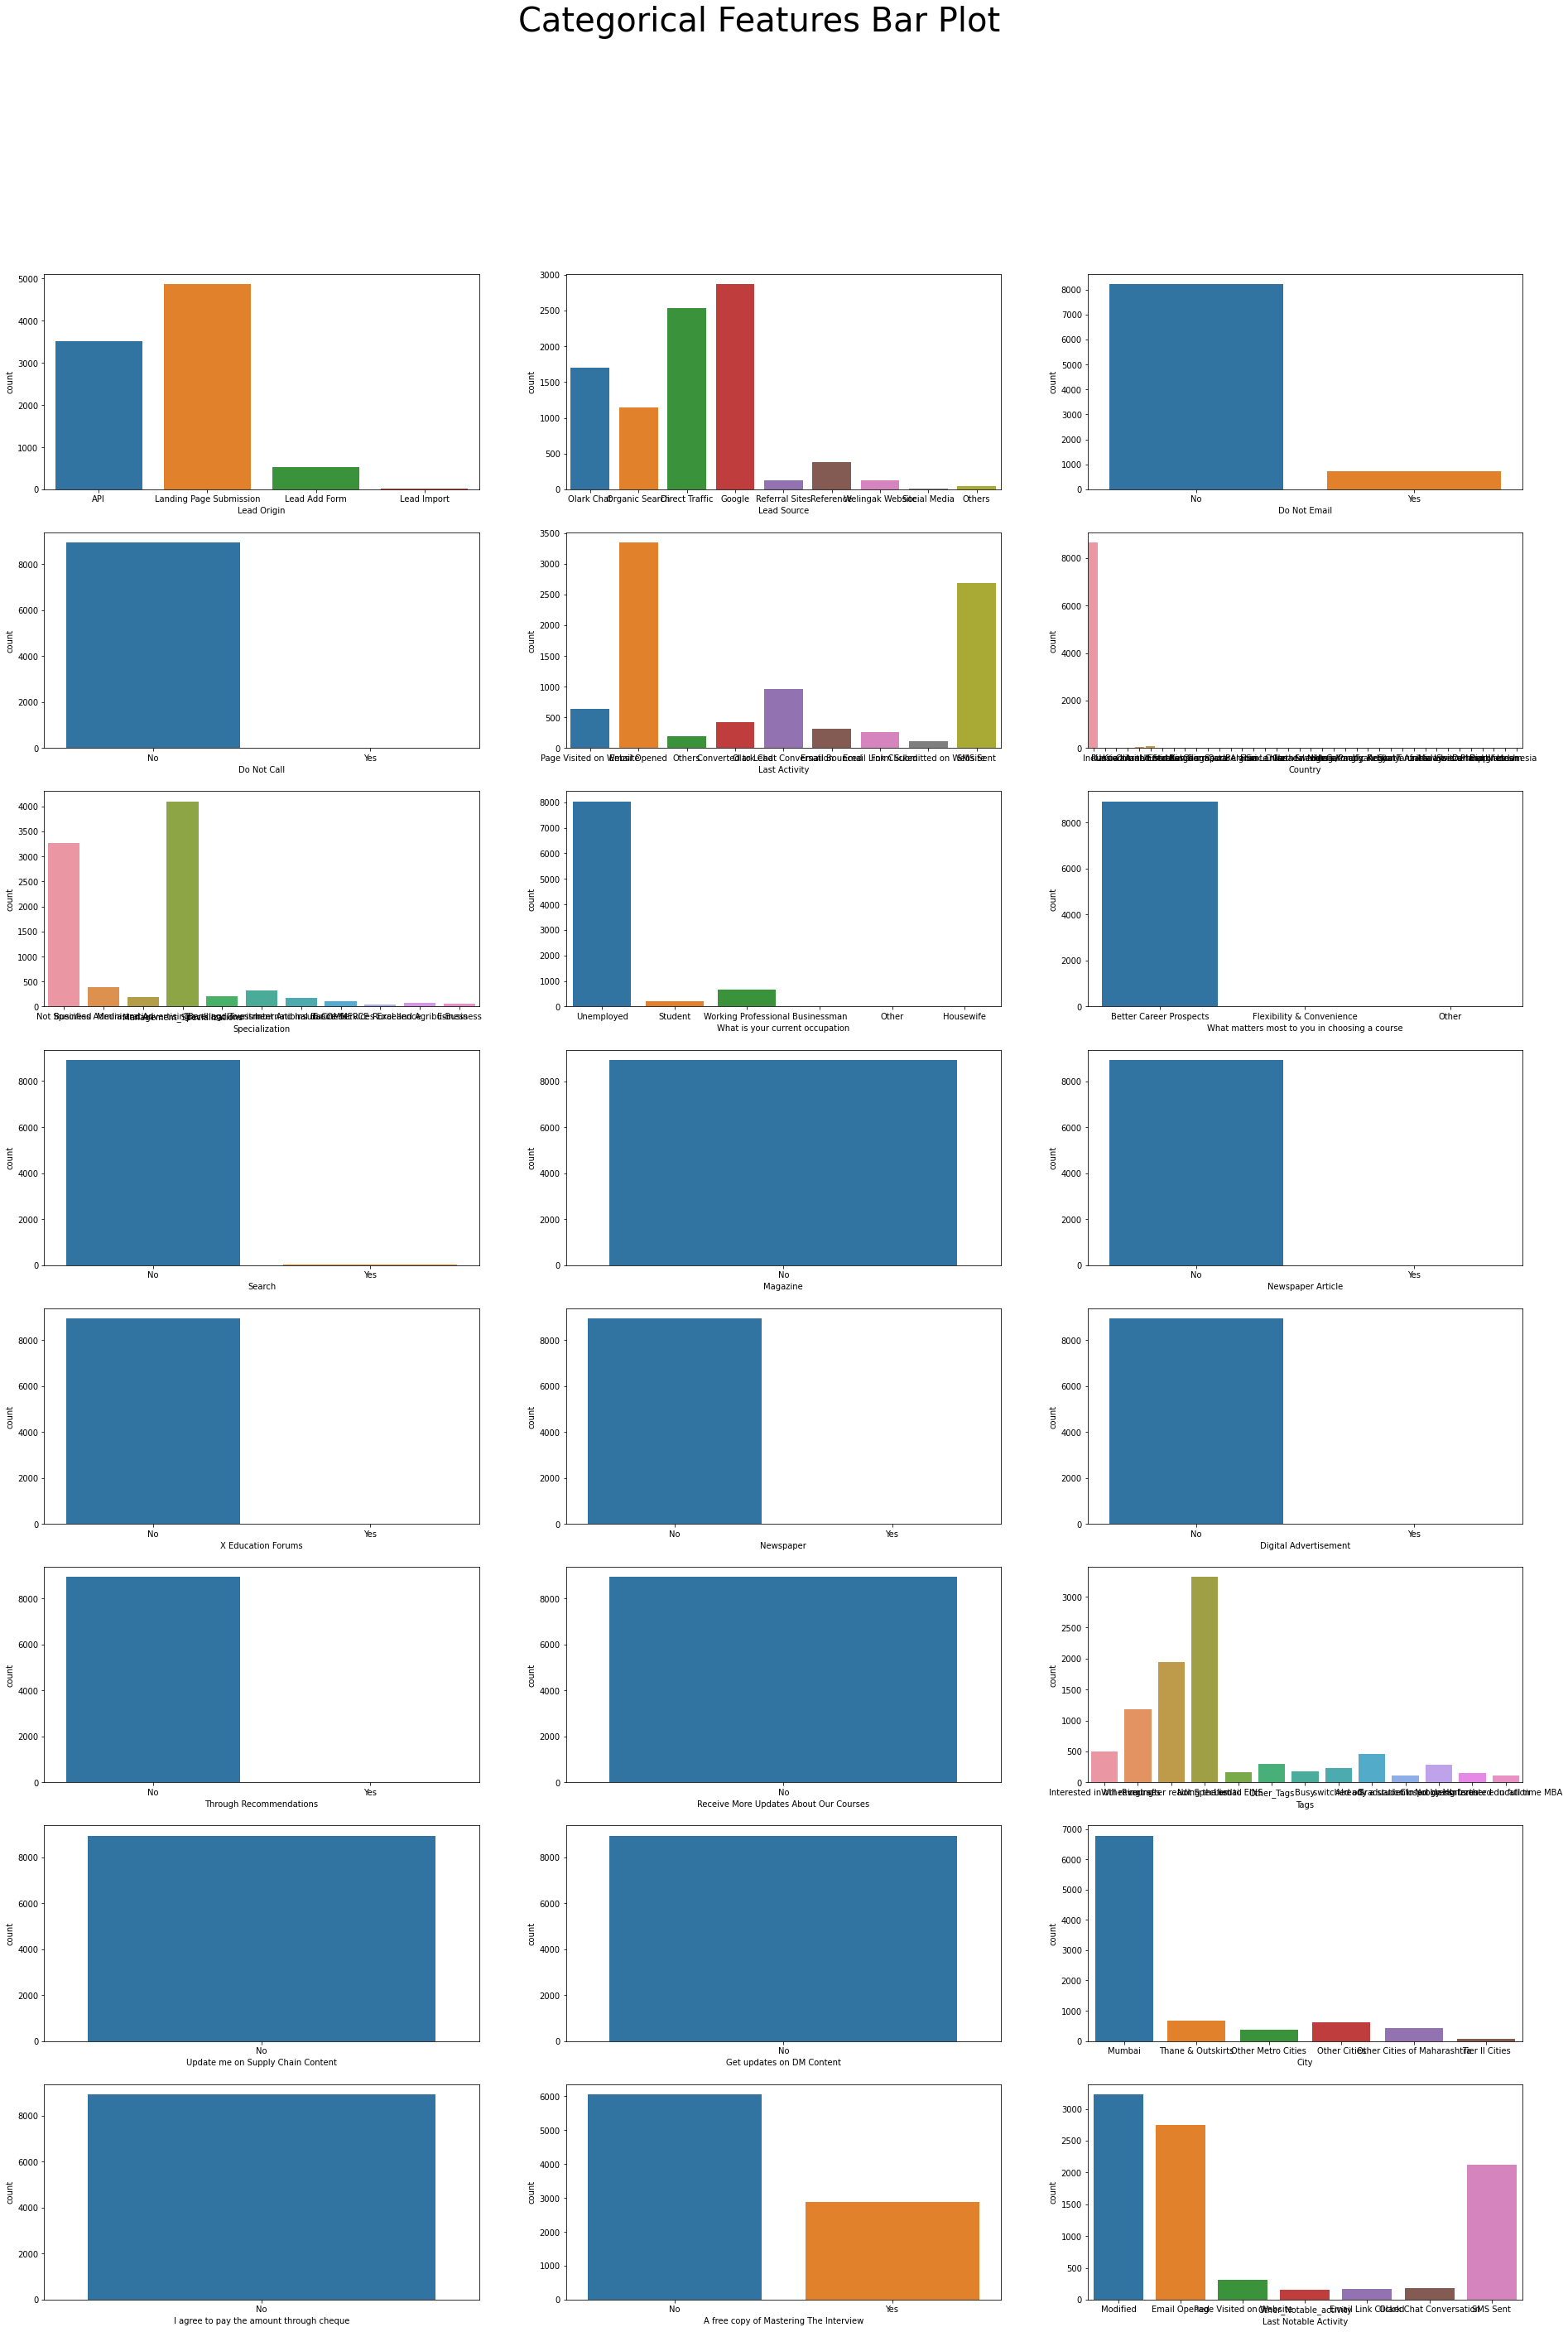

In [36]:
#let's figure out and plot categorical variables.
cat_features = df.select_dtypes(include = ['object']).columns
fig,ax=plt.subplots(8, 3, figsize=(32, 45))
fig.suptitle('Categorical Features Bar Plot', fontsize = 40)
w = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.countplot(ax = ax[i][j], x=df[cat_features[w]])
        w +=1
plt.show()

**By looking at charts can understand there are some imbalanced features that should be dropped.**

In [37]:
colms_to_drop.extend(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement','Through Recommendations',
                      'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque'])

In [38]:
#let's drop colms_to_drop features and save it in Leads dataframe
Leads  = df.drop(labels = colms_to_drop , axis= 1)
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8933 non-null   object 
 1   Lead Source                             8933 non-null   object 
 2   Do Not Email                            8933 non-null   object 
 3   Converted                               8933 non-null   int64  
 4   TotalVisits                             8933 non-null   float64
 5   Total Time Spent on Website             8933 non-null   int64  
 6   Page Views Per Visit                    8933 non-null   float64
 7   Last Activity                           8933 non-null   object 
 8   Specialization                          8933 non-null   object 
 9   What is your current occupation         8933 non-null   object 
 10  Tags                                    8933 non-null   obje

<a name = "2.4.2"></a>
### 2.4.2 Numerical Variables
**So far we checked categorical features, right now we are going to analyze numerical variables.** let's go!

In [39]:
#let's check how much of data have "converted" label. 
print('There are %2.2f percent of data with "Converted Value = 1 "' 
      %((sum(Leads['Converted'] / len(Leads.index)))*100))

There are 37.33 percent of data with "Converted Value = 1 "


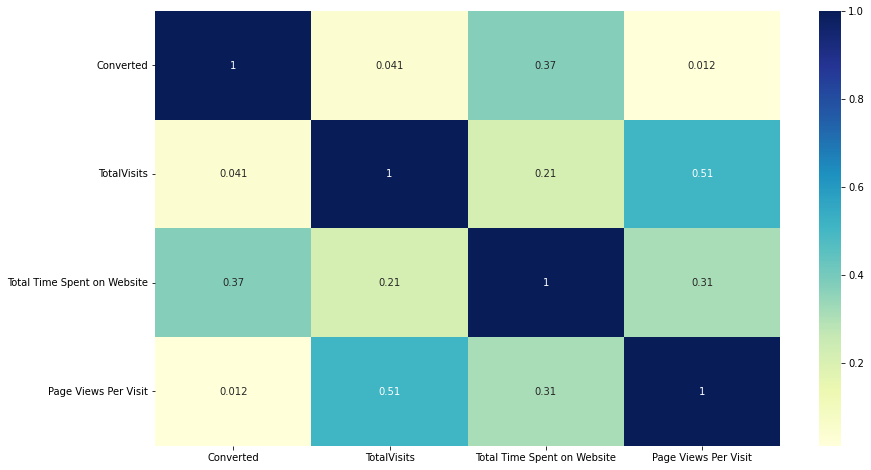

In [40]:
#Correlation:
plt.figure(figsize = (14,8))
sns.heatmap(Leads.corr(), annot= True, cmap="YlGnBu")
plt.show()

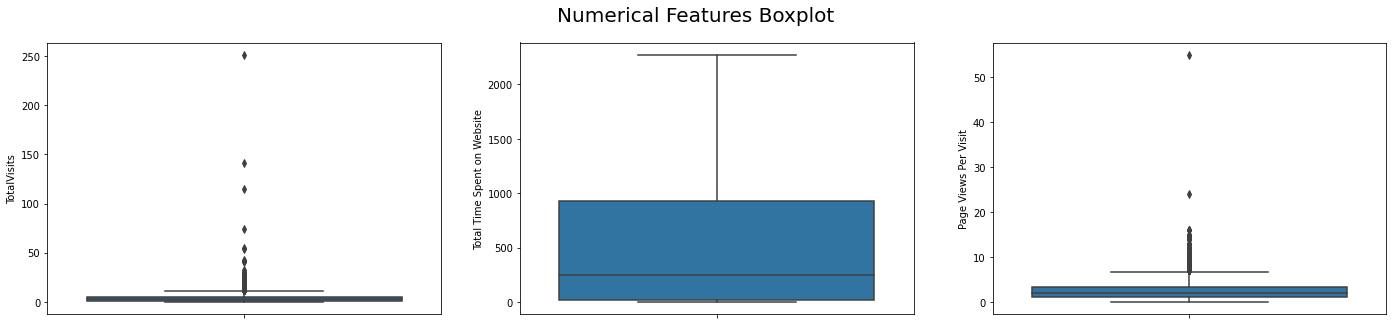

In [41]:
#checking numerical variables.
numeric_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
fig,ax=plt.subplots(1, 3, figsize=(24, 5))
fig.suptitle('Numerical Features Boxplot', fontsize = 20)
for i in range(ax.shape[0]):
    sns.boxplot(ax = ax[i], y = Leads[numeric_var[i]])
plt.show()

**It seems there are outliers in TotalVisits and Page Views Per Visit variables** let's check them.

In [42]:
pd.DataFrame(Leads[numeric_var]).describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8933.000000,8933.000000,8933.000000
mean,3.498377,488.013433,2.397142
std,4.879254,545.752479,2.157053
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,18.000000,1.000000
50%,3.000000,251.000000,2.000000
75%,5.000000,932.000000,3.330000
90%,7.000000,1377.000000,5.000000
95%,10.000000,1558.000000,6.000000


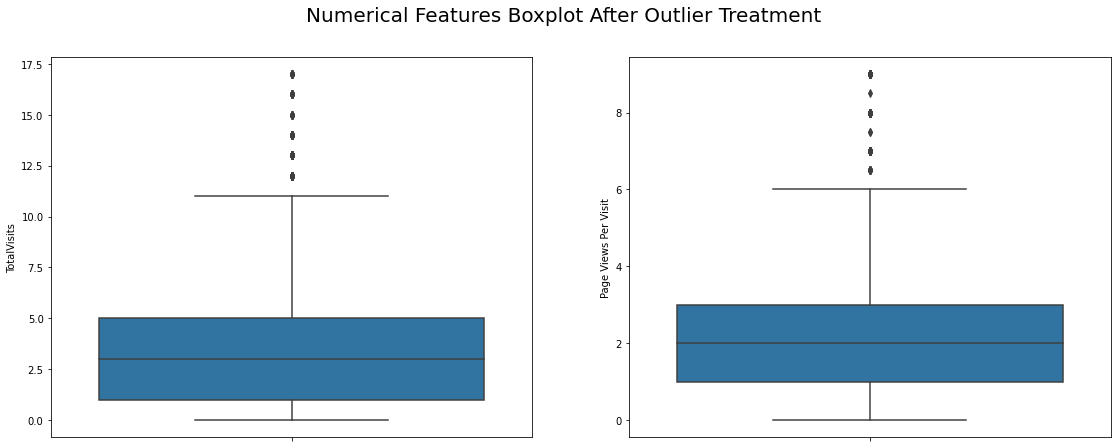

In [43]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q1 = Leads['TotalVisits'].quantile(0.01)
Q3 = Leads['TotalVisits'].quantile(0.99)

Leads = Leads[(Leads['TotalVisits']>=Q1)]
Leads = Leads[(Leads['TotalVisits']<=Q3)]

Q1 = Leads['Page Views Per Visit'].quantile(0.01)
Q3 = Leads['Page Views Per Visit'].quantile(0.99)

Leads = Leads[(Leads['Page Views Per Visit']>=Q1)]
Leads = Leads[(Leads['Page Views Per Visit']<=Q3)]

fig,ax=plt.subplots(1, 2, figsize=(19, 7))
fig.suptitle('Numerical Features Boxplot After Outlier Treatment', fontsize = 20)

sns.boxplot(ax = ax[0], y = Leads['TotalVisits'])
sns.boxplot(ax = ax[1], y = Leads['Page Views Per Visit'])
plt.show()

**Let's check Numerical Variables vs Converted variabe**.

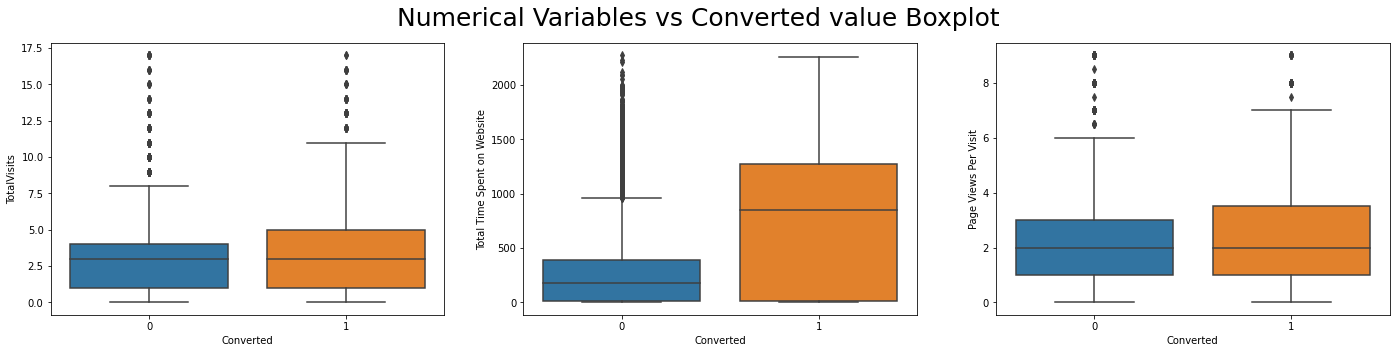

In [44]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5))
fig.suptitle('Numerical Variables vs Converted value Boxplot', fontsize = 25)
for i in range(ax.shape[0]):
    sns.boxplot(ax = ax[i], x = Leads.Converted, y = Leads[numeric_var[i]])
plt.show()

**Inference**

    1- In the TotalVisite variable; the median for both converted and unconverted are close
    2- In the Total Time Spending Website; It seems leads can be converted if they spand more time on the website.
    3- In the Page Views Per Visit; It's more like the Total Visits.

<a name = "2.4.3"></a>
### 2.4.3 Dummy Variables Creation

In [45]:
#Let's Update Categorical features
cat_features = Leads.select_dtypes(include='object').columns
cat_features

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
#The variables that should be mapped
VAR = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[VAR] = Leads[VAR].apply(binary_map)
Leads[VAR]

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,1
9237,1,1
9238,0,0


In [47]:
#get_dummies of 'Lead Origin' and 'What is your occupation' by dropping the first level and add to master data
dummy = pd.get_dummies(Leads[['Lead Origin', 'What is your current occupation']], drop_first=True)
Leads = pd.concat([Leads, dummy], axis=1)
Leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,Modified,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,Email Opened,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,Email Opened,1,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,Modified,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,Modified,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,Other_Notable_activity,1,0,0,0,0,0,1,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,1,SMS Sent,1,0,0,0,0,0,1,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,1,SMS Sent,1,0,0,0,0,0,1,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,SMS Sent,1,0,0,0,0,0,1,0


In [48]:
#get dummies; other features
dummy_1 = pd.get_dummies(Leads['Specialization'], prefix='Specialization')
dummy_2 = pd.get_dummies(Leads['Lead Source'], prefix = 'Lead Source')
dummy_3 = pd.get_dummies(Leads['Last Activity'], prefix = 'Last Activity')
dummy_4 = pd.get_dummies(Leads['Last Notable Activity'], prefix = 'Last Notable Activity')
dummy_5 = pd.get_dummies(Leads['Tags'], prefix = 'Tags')

#dropping some lables
dummy_1 = dummy_1.drop(['Specialization_Not Specified'], axis = 1)
dummy_2 = dummy_2.drop(['Lead Source_Others'], axis = 1)
dummy_3 = dummy_3.drop(['Last Activity_Others'], axis = 1)
dummy_4 = dummy_4.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
dummy_5 = dummy_5.drop(['Tags_Not Specified'], axis = 1)

#adding to master data
Leads = pd.concat([Leads, dummy_1, dummy_2, dummy_3, dummy_4, dummy_5], axis = 1)
Leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,1,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#dropping master data categorical features 
Leads.drop(cat_features, axis = 1, inplace = True)
Leads.head(3)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


<a name = '2.5' ></a>
### 2.5 Feature Scaling

In [50]:
Y = Leads.Converted
X = Leads.drop('Converted', axis = 1)

scaler = StandardScaler()
X[numeric_var] = scaler.fit_transform(X[numeric_var])
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,-1.100354,-0.889188,-1.218669,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.623229,0.347838,0.105519,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.410921,1.922568,-0.159319,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.755637,-0.329406,-0.688994,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.410921,1.731692,-0.688994,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1.657379,2.497033,0.195564,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9236,-0.410921,-0.452375,-0.159319,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,-0.410921,-0.523953,-0.159319,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,-0.066204,0.026652,0.370357,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x = X.to_numpy()
y = Y.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=7)
print(' The shape of X_train is: ', X_train.shape,'\n',
      'The shape of Y_train is: ', Y_train.shape,'\n',
      'The shape of X_test is:  ', X_test.shape,  '\n',
      'The shape of Y_test is:  ', Y_test.shape)

 The shape of X_train is:  (6148, 55) 
 The shape of Y_train is:  (6148,) 
 The shape of X_test is:   (2636, 55) 
 The shape of Y_test is:   (2636,)


<a name = "2.6" ></a>
### 2.6 Logistic Regression, Manually (optional)

In this part, I have tried to provide a simple Logistic Regression to show the details and mathematics behind this algorithm. Since working on two dimensional is more manageable than other dimensions, I utilized two first numerical features in order to implement Logistic Regression step by step. So this part is separate from our project and it's only provided to help machine learning starters to realize the mathematics and vectorization behind the algorithm. if you know the detail, skip this part.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_test, Y_test, test_size= 0.2, random_state=1)
x_train, x_test, y_train, y_test = x_train[:,0:2], x_test[:,0:2], y_train, y_test
print(' The shape of X_train is: ', x_train.shape,'\n',
      'The shape of Y_train is: ', y_train.shape,'\n',
      'The shape of X_test is:  ', x_test.shape,  '\n',
      'The shape of Y_test is:  ', y_test.shape)

 The shape of X_train is:  (2108, 2) 
 The shape of Y_train is:  (2108,) 
 The shape of X_test is:   (528, 2) 
 The shape of Y_test is:   (528,)


<a name = "2.6.1"></a>
### 2.6.1 View the variables

Ploting data help us to get more familiar with our dataset. So before starting to implement Logistic Regression, It will good to visualize the data if possible


In [53]:
print('The firtst five values of x_train:', x_train[:5,:])

The firtst five values of x_train: [[-0.41092074 -0.16422477]
 [ 0.27851251 -0.59920276]
 [-1.100354   -0.88918808]
 [ 0.27851251 -0.63223906]
 [-0.06620412 -0.56616646]]


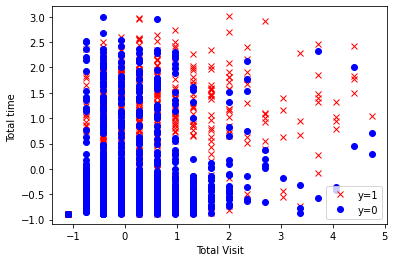

In [54]:
# Plot examples
def Scat_Plot(X, Y):
    poss = Y==1
    neg  = Y==0
    plt.plot(X[poss, 0], X[poss, 1], 'rx', label = 'y=1')
    plt.plot(X[neg, 0], X[neg, 1], 'bo', label = 'y=0')

Scat_Plot(x_train, y_train)
plt.xlabel('Total Visit')
plt.ylabel('Total time ')
plt.legend(loc = 'lower right')
plt.show()

<a name="2.6.2"></a>
### 2.6.2  Sigmoid function

we know in logistic regression, the model is represented as
<summary><font size="2" color="darkblue" ><b>
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)\tag{1}$$
</b></font></summary>

where function $g$ is the `sigmoid function`. The sigmoid function is defined as:

<summary><font size = "2" color='darkblue'><b>
$$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$
</b></font></summary><b>

In [55]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1 / (1 + np.exp(-z))     #look function (2)

    return g

<a name="2.6.3"></a>
### 2.6.3 Cost function for logistic regression

Recall that for logistic regression, the cost function is of the form
<summary><font size = "2" color = "darkblue"><b>
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=1}^{m} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{3}$$
</b></font></summary>
where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - <b></b>
<summarya><font size = "2" color = 'darkblue'><b>
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{4}$$
</b></font></summary><b>
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

In [56]:
def Cost_Function(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape

    z = np.dot(X, w) + b                                                   #function (1)
    g = sigmoid(z)
    total_cost = 1/m * (-np.dot(y.T, np.log(g))-np.dot((1-y).T, np.log(1-g)))   #function(3)

    return total_cost

<a name="2.6.4"></a>
### 2.6.4 Gradient for logistic regression

Recall that the gradient descent algorithm is:
<summary><font size = "2" color = "darkblue"><b>
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j := 1..n}\newline & \rbrace\end{align*}$$
</b></font></summary>
where, parameters $b$, $w_j$ are all updated simultaniously and
<summary><font size = "2" color = "darkblue"><b>
$$\begin{align*}\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum\limits_{i=1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)} - \mathbf{y}^{(i)})\tag{6}\newline\; \frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum\limits_{i=1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{i} \tag{7} \end{align*}$$

In [57]:
def LogReg_gradient(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 

    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape

    z = np.dot(X, w) + b                        #function (1)
    
    g = sigmoid(z)                              #function (2)

    dj_db = 1/m * np.sum((g-y), axis = 0)                 #function (6) for b 
    
    dj_dw = (1/m * np.dot((g-y).T, X)).T        #function (6) for w
    return dj_db, dj_dw

<a name="2.6.5"></a>
### 2.6.5 Learning parameters using gradient descent 

By using gradient descent, we will find the optimal parameters of a logistic regression model


In [58]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = LogReg_gradient(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  Cost_Function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.


In [59]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = 0

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,np.reshape(y_train, (-1,1)), initial_w, initial_b, 
                                   alpha, iterations)

Iteration    0: Cost     0.69   
Iteration 1000: Cost     0.65   
Iteration 2000: Cost     0.63   
Iteration 3000: Cost     0.61   
Iteration 4000: Cost     0.60   
Iteration 5000: Cost     0.60   
Iteration 6000: Cost     0.59   
Iteration 7000: Cost     0.59   
Iteration 8000: Cost     0.59   
Iteration 9000: Cost     0.59   
Iteration 9999: Cost     0.59   


In [60]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    Scat_Plot(X, y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        plt.plot(plot_x, plot_y, c="k")
        
    else:
        u = np.linspace(-2, 5, 50)
        v = np.linspace(-1, 4, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

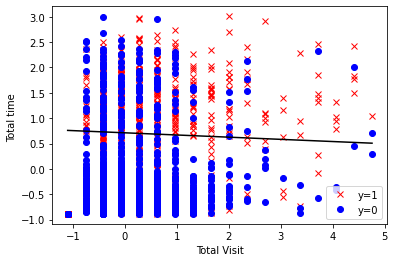

In [61]:
plot_decision_boundary(w, b, x_train, y_train)
plt.xlabel('Total Visit')
plt.ylabel('Total time ')
plt.legend(loc = 'lower right')
plt.show()

it seems we have classified data very badly, let's evalute our model to see more

<a name="2.6.7"></a>
### 2.6.7 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

we will implement the `predict` function below to do this.

- First we need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)})$ for every example 
    - We've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, we can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

In [62]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    z_p = np.dot(X, w) + b
    g_p = sigmoid(z_p)
    p = g_p >= 0.5
    return p

Now let's use this to compute the accuracy on the training set

In [63]:
#Compute accuracy on our training set
p = predict(x_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 56.310468


High bias has been accrued. so how can we deal with high bias: it seems this conflict is not about data, maybe we need to check more complexity in data, so let's check the polynomial feature.

<a name="2.6.8"></a>
### 2.6.8 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the Nth power.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^{N-1}\\
x_2^{N}\end{array}\right]$$

As a result of this mapping, our vector of two features has been transformed into a ($\frac {(N+1)(N+2)}{2}-1$)-dimensional vector. 

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot. 
- We have provided the `map_feature` function in the following.

In [64]:
def map_feature(X1, X2, deg = 3):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = deg
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [65]:
print("Original shape of data:", x_train.shape)

mapped_x_train =  map_feature(x_train[:, 0], x_train[:, 1], deg=3)
print("Shape after feature mapping:", mapped_x_train.shape)

Original shape of data: (2108, 2)
Shape after feature mapping: (2108, 9)


In [66]:
np.random.seed(1)
N = len(mapped_x_train[1])
initial_w = 0.01 * (np.random.rand(N).reshape(-1,1) - 0.5)
initial_b = 0

# Some gradient descent settings
iterations = 10000
alpha = 0.1

w,b, J_history,_ = gradient_descent(mapped_x_train,np.reshape(y_train, (-1,1)), initial_w, initial_b, 
                                   alpha, iterations)

Iteration    0: Cost     0.68   
Iteration 1000: Cost     0.54   
Iteration 2000: Cost     0.54   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.54   
Iteration 5000: Cost     0.54   
Iteration 6000: Cost     0.54   
Iteration 7000: Cost     0.54   
Iteration 8000: Cost     0.54   
Iteration 9000: Cost     0.54   
Iteration 9999: Cost     0.54   


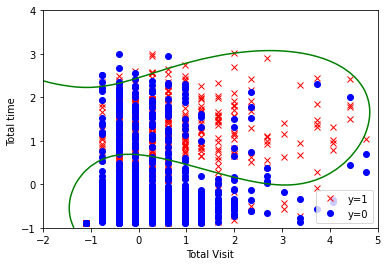

In [67]:
# Plot examples
plot_decision_boundary(w, b, mapped_x_train, y_train)

# Set the x_axis and y-axis label
plt.xlabel('Total Visit')
plt.ylabel('Total time ')
plt.legend(loc = 'lower right')
plt.show()

it seems better but we know is not enough. anyway, since we intended to check how logistic regression works in detail, we wouldn't like to deal with this problem. we know our model has not been fitted to the data, and maybe we should check more features, maybe there is a link (dependency) between data or somethings else, how ever we wouldn't like to talk about it in this part. As a more detail of logistic regression we've provided regularization in the following to see how it works. 

**we should use Regularization if we encountered high variance. Since we don't need it here I just have provided its formulation and its code.**
### 2.7 Regularized Logistic Regression(Optional)
<details>
    <summary><font size = '2' color = 'darkgreen'><b>CLICK HERE.</b>
        </font></summary>
    
<a name = '2.7'></a>
### 2.7 Regularized Logistic Regression, Manually

In this part, you will show how to implement regularized logistic regression.

<a name='2.7.1'></a>
### 2.7.1 Cost function for regularized logistic regression

Recall that for regularized logistic regression, the cost function is of the form <summary><font size = '2' color = 'darkblue'><b>
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2\tag{8}$$
</b></font></summary>
Compare this to the cost function without regularization, which is of the form <summary><font size='2' color = 'darkblue'><b>
$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]\tag{3,4}$$
</b></font></summary>
The difference is the regularization term, which is<font size='2' color = 'darkblue'><b> $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2\tag{9}$$ </b></font>
Note that the $b$ parameter is not regularized.
<details>
  <summary><font size="2" color="darkgreen"><b>CLICK HERE TO SEE CODE</b></font></summary>
    
    
* Here's how we can structure the overall implementation for this function
    ```python 
       def compute_cost_reg(X, y, w, b, lambda_ = 1):
            Computes the cost over all examples
            """Args:
              X : (array_like Shape (m,n)) data, m examples by n features
              y : (array_like Shape (m,)) target value 
              w : (array_like Shape (n,)) Values of parameters of the model      
              b : (array_like Shape (n,)) Values of bias parameter of the model
              lambda_ : (scalar, float)    Controls amount of regularization
            Returns:
              total_cost: (scalar)         cost """
            m, n = X.shape
            
            #Calls the compute_cost function that we implemented above
            cost_without_reg = compute_cost(X, y, w, b) 
            
            reg_cost = 0.
            
            reg_cost = np.dot(w,w)
            
            # Add the regularization cost to get the total cost
            total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost
            
            return total_cost

    ```

     </b></font></summary></details>  

<a name="3.7.2"></a>
### 2.7.2 Gradient for regularized logistic regression

The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:
<summary><font size = '2' color = 'darkblue'><b>
$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{6}$$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=1...(n)$}\tag{10}$$
</b></font></summary>

Compare this to the gradient of the cost function without regularization, which is of the form 
<summary><font size = '2' color = 'darkblue'><b>
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{6}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{7}
$$
</b></font></summary>

As we can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=1...(n)$}$$ 

<details><summary><font size = '2' color = 'darkgreen'><b>Gradient Code</b></font></summary>
    
* Here's how we can structure the overall implementation for this function
    ```Python
    def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    
    dj_dw = dj_dw + lambda_/m * w                 
        
    return dj_db, dj_dw
    ```

</details>

**Let's back to our project.**

<a name = '2.8'></a>
### 2.8 Logistic Regression Model
There are a lot of features in the data and it will be a good job to check them. we're going to rank features and select features by recursively considering smaller sets of features. so we are utilizing [RFE (Recursive Feature Elimination)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) and also we are employing [Statsmodels](https://conference.scipy.org/proceedings/scipy2010/pdfs/seabold.pdf) in order to use some statistical analysis.  

In [68]:
Logreg = LogisticRegression()
rfe = RFE(Logreg, 20)
rfe.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [69]:
#Features selected by RFE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=7)
feature_selected = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
feature_selected.head(10)

,0,1,2
0,TotalVisits,False,27
1,Total Time Spent on Website,False,3
2,Page Views Per Visit,False,26
3,Lead Origin_Landing Page Submission,False,10
4,Lead Origin_Lead Add Form,True,1
5,Lead Origin_Lead Import,False,32
6,What is your current occupation_Housewife,False,31
7,What is your current occupation_Other,False,24
8,What is your current occupation_Student,False,14
9,What is your current occupation_Unemployed,False,15


<a name='2.8.1'></a>
### 2.8.1 Building Model

In [70]:
#let's figure out selected features to buil models.
features = X_train.columns[rfe.support_]

#by utilizing Generalized Linear Model (GLM) we check p-value for features and our model.
#we can reject features if its p-value is high. 
X_train_sm = sm.add_constant(X_train[features])
logmodel = sm.GLM(Y_train, X_train_sm, family= sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6148
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.5
Date:                Mon, 10 Oct 2022   Deviance:                       2571.0
Time:                        01:36:06   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5949
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3380      0.104    -12.869      0.000      -1.542      -1.134
Lead Origin_Lead Add Form                         1.2060      0.486      2.483      0.013       0.254       2.158
Specialization_Travel and Tourism                -1.3045      0.433     -3.014      0.003      -2.153      -0.456
Lead Source_Direct Traffic                       -0.4031      0.140     -2.871      0.004      -0.678      -0.128
Lead Source_Google                                0.0797      0.123      0.650      0.516      -0.161       0.320
Lead Source_Referral Sites                       -0.3076      0.440     -0.699      0.484      -1.170       0.555
Lead Source_Welingak Website                      3.4561      1.129      3.061      0.002       1.243       5.669
Last Activity_SMS Sent                            1.3814      0.221      6.255      0.000       0.949       1.814
Last Notable Activity_Modified                   -1.3652      0.151     -9.014      0.000      -1.662      -1.068
Last Notable Activity_Olark Chat Conversation    -1.3445      0.404     -3.324      0.001      -2.137      -0.552
Last Notable Activity_SMS Sent                    1.1506      0.256      4.493      0.000       0.649       1.653
Tags_Already a student                           -3.0618      0.714     -4.286      0.000      -4.462      -1.662
Tags_Closed by Horizzon                           6.4976      0.727      8.941      0.000       5.073       7.922
Tags_Interested  in full time MBA                -1.6755      0.724     -2.313      0.021      -3.095      -0.256
Tags_Interested in other courses                 -2.1611      0.468     -4.621      0.000      -3.078      -1.245
Tags_Lost to EINS                                 6.4112      0.726      8.836      0.000       4.989       7.833
Tags_Not doing further education                 -2.6918      1.018     -2.644      0.008      -4.687      -0.696
Tags_Other_Tags                                  -1.9496      0.299     -6.517      0.000      -2.536      -1.363
Tags_Ringing                                     -4.1150      0.288    -14.298      0.000      -4.679      -3.551
Tags_Will revert after reading the email          4.9662      0.202     24.612      0.000       4.571       5.362
Tags_switched off                                -4.5617      0.725     -6.296      0.000      -5.982      -3.142
=================================================================================================================
"""

In [71]:
#p-value for Lead Source_Google is high, so we reject it.
to_drop = ['Lead Source_Google', 'Lead Source_Referral Sites']
features = features.drop(to_drop)
features

Index(['Lead Origin_Lead Add Form', 'Specialization_Travel and Tourism',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [72]:
X_train_sm = sm.add_constant(X_train[features])
logmodel = sm.GLM(Y_train, X_train_sm, family=sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6148
Model:                            GLM   Df Residuals:                     6129
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.1
Date:                Mon, 10 Oct 2022   Deviance:                       2572.1
Time:                        01:36:10   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5948
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3093      0.084    -15.647      0.000      -1.473      -1.145
Lead Origin_Lead Add Form                         1.1686      0.481      2.429      0.015       0.226       2.112
Specialization_Travel and Tourism                -1.3175      0.432     -3.050      0.002      -2.164      -0.471
Lead Source_Direct Traffic                       -0.4370      0.125     -3.483      0.000      -0.683      -0.191
Lead Source_Welingak Website                      3.4617      1.129      3.066      0.002       1.248       5.675
Last Activity_SMS Sent                            1.3996      0.220      6.372      0.000       0.969       1.830
Last Notable Activity_Modified                   -1.3668      0.151     -9.052      0.000      -1.663      -1.071
Last Notable Activity_Olark Chat Conversation    -1.3586      0.402     -3.381      0.001      -2.146      -0.571
Last Notable Activity_SMS Sent                    1.1402      0.255      4.471      0.000       0.640       1.640
Tags_Already a student                           -3.0604      0.714     -4.284      0.000      -4.460      -1.660
Tags_Closed by Horizzon                           6.5101      0.727      8.960      0.000       5.086       7.934
Tags_Interested  in full time MBA                -1.6522      0.724     -2.283      0.022      -3.071      -0.234
Tags_Interested in other courses                 -2.1758      0.467     -4.656      0.000      -3.092      -1.260
Tags_Lost to EINS                                 6.4221      0.725      8.852      0.000       5.000       7.844
Tags_Not doing further education                 -2.6855      1.018     -2.637      0.008      -4.681      -0.690
Tags_Other_Tags                                  -1.9499      0.299     -6.521      0.000      -2.536      -1.364
Tags_Ringing                                     -4.1106      0.288    -14.283      0.000      -4.675      -3.547
Tags_Will revert after reading the email          4.9742      0.201     24.750      0.000       4.580       5.368
Tags_switched off                                -4.5567      0.725     -6.289      0.000      -5.977      -3.137
=================================================================================================================
"""

It seems the p-values are less we can check the [Variance Inflation Factor](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html?highlight=variance_inflation_factor) to see if there is any `correlation` between the variables

In [73]:
VIF = pd.DataFrame()
VIF['Features'] = X_train[features].columns
VIF['vif'] = [variance_inflation_factor(X_train[features].values, i) for i in range(X_train[features].shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF

,Features,vif
0,Lead Origin_Lead Add Form,0.49
1,Specialization_Travel and Tourism,1.02
2,Lead Source_Direct Traffic,0.16
3,Lead Source_Welingak Website,1.32
4,Last Activity_SMS Sent,0.22
5,Last Notable Activity_Modified,0.11
6,Last Notable Activity_Olark Chat Conversation,1.01
7,Last Notable Activity_SMS Sent,0.91
8,Tags_Already a student,0.22
9,Tags_Closed by Horizzon,1.15


Since vif for features are low, so there is not variable that has highly collinear with the other explanatory variables

In [74]:
Y_train_pred = res.predict(X_train_sm)
predicted = Y_train_pred.map(lambda r: 1 if r>=0.5 else 0)
Train_results = pd.DataFrame({"Converted":Y_train, "Converted_Pred":Y_train_pred, 'Predicted':predicted})
Train_results['ID'] = Y_train.index
Train_results.tail(10)

,Converted,Converted_Pred,Predicted,ID
6457,0,0.019416,0,6457
3456,1,0.997984,1,3456
4702,0,0.007753,0,4702
2773,1,0.975034,1,2773
7976,0,0.042570,0,7976
1495,0,0.004408,0,1495
1006,0,0.212604,0,1006
4565,0,0.064397,0,4565
6014,0,0.688583,1,6014
584,0,0.004408,0,584


<a name = '2.8.2'></a>
### 2.8.2 Evaluate Model

In [75]:
Confusion = metrics.confusion_matrix(Train_results.Converted, Train_results.Predicted)
print("Confusion Matrix is:",'\n', Confusion,'\n',
      '='*45, "\n",
      'Train accuracy:', round(metrics.accuracy_score(Train_results.Converted, Train_results.Predicted),2))

Confusion Matrix is: 
 [[3720  131]
 [ 312 1985]] 
 Train accuracy: 0.93


In [76]:
TP = Confusion[0,0] # true positive 
TN = Confusion[1,1] # true negatives
FP = Confusion[1,0] # false positives
FN = Confusion[0,1] # false negatives
precision = TP/(TP+FP)
Recall = TP / (TP + FP)
F1_Score = (2*precision * Recall) / (precision+Recall)
print("F1_Score for training data is: ", F1_Score)

F1_Score for training data is:  0.9226190476190477


**Receiver operating characteristic**

In [77]:
def Roc_curve(actual, probs):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

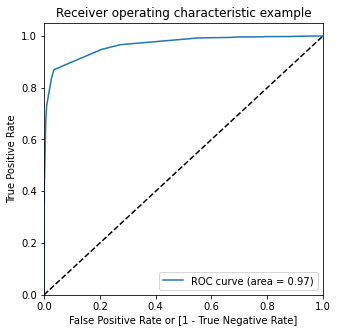

In [78]:
Roc_curve(Train_results.Converted, Train_results.Converted_Pred)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

In [79]:
#Let's check test data
X_test_sm = sm.add_constant(X_test[features])
Y_test_pred = res.predict(X_test_sm)
Y_test_pred = Y_test_pred.map(lambda x:1 if x>=0.5 else 0)
accuracy = metrics.accuracy_score(Y_test, Y_test_pred)
print('Accuracy for test data is: ', round(accuracy,2))

Accuracy for test data is:  0.91


<a name = '3'></a>
### 3 References:
- [Machine Learning Specialization, DeepLearning.AI](https://www.deeplearning.ai/courses/machine-learning-specialization/)
- [Kaggle, X_Education problem Lead Score guideline](https://www.kaggle.com/code/amolbhone/lead-score-upgrad-case-study-about-x-education/data)
- [statsmodels: Econometric and statistical modeling with python](https://conference.scipy.org/proceedings/scipy2010/pdfs/seabold.pdf)